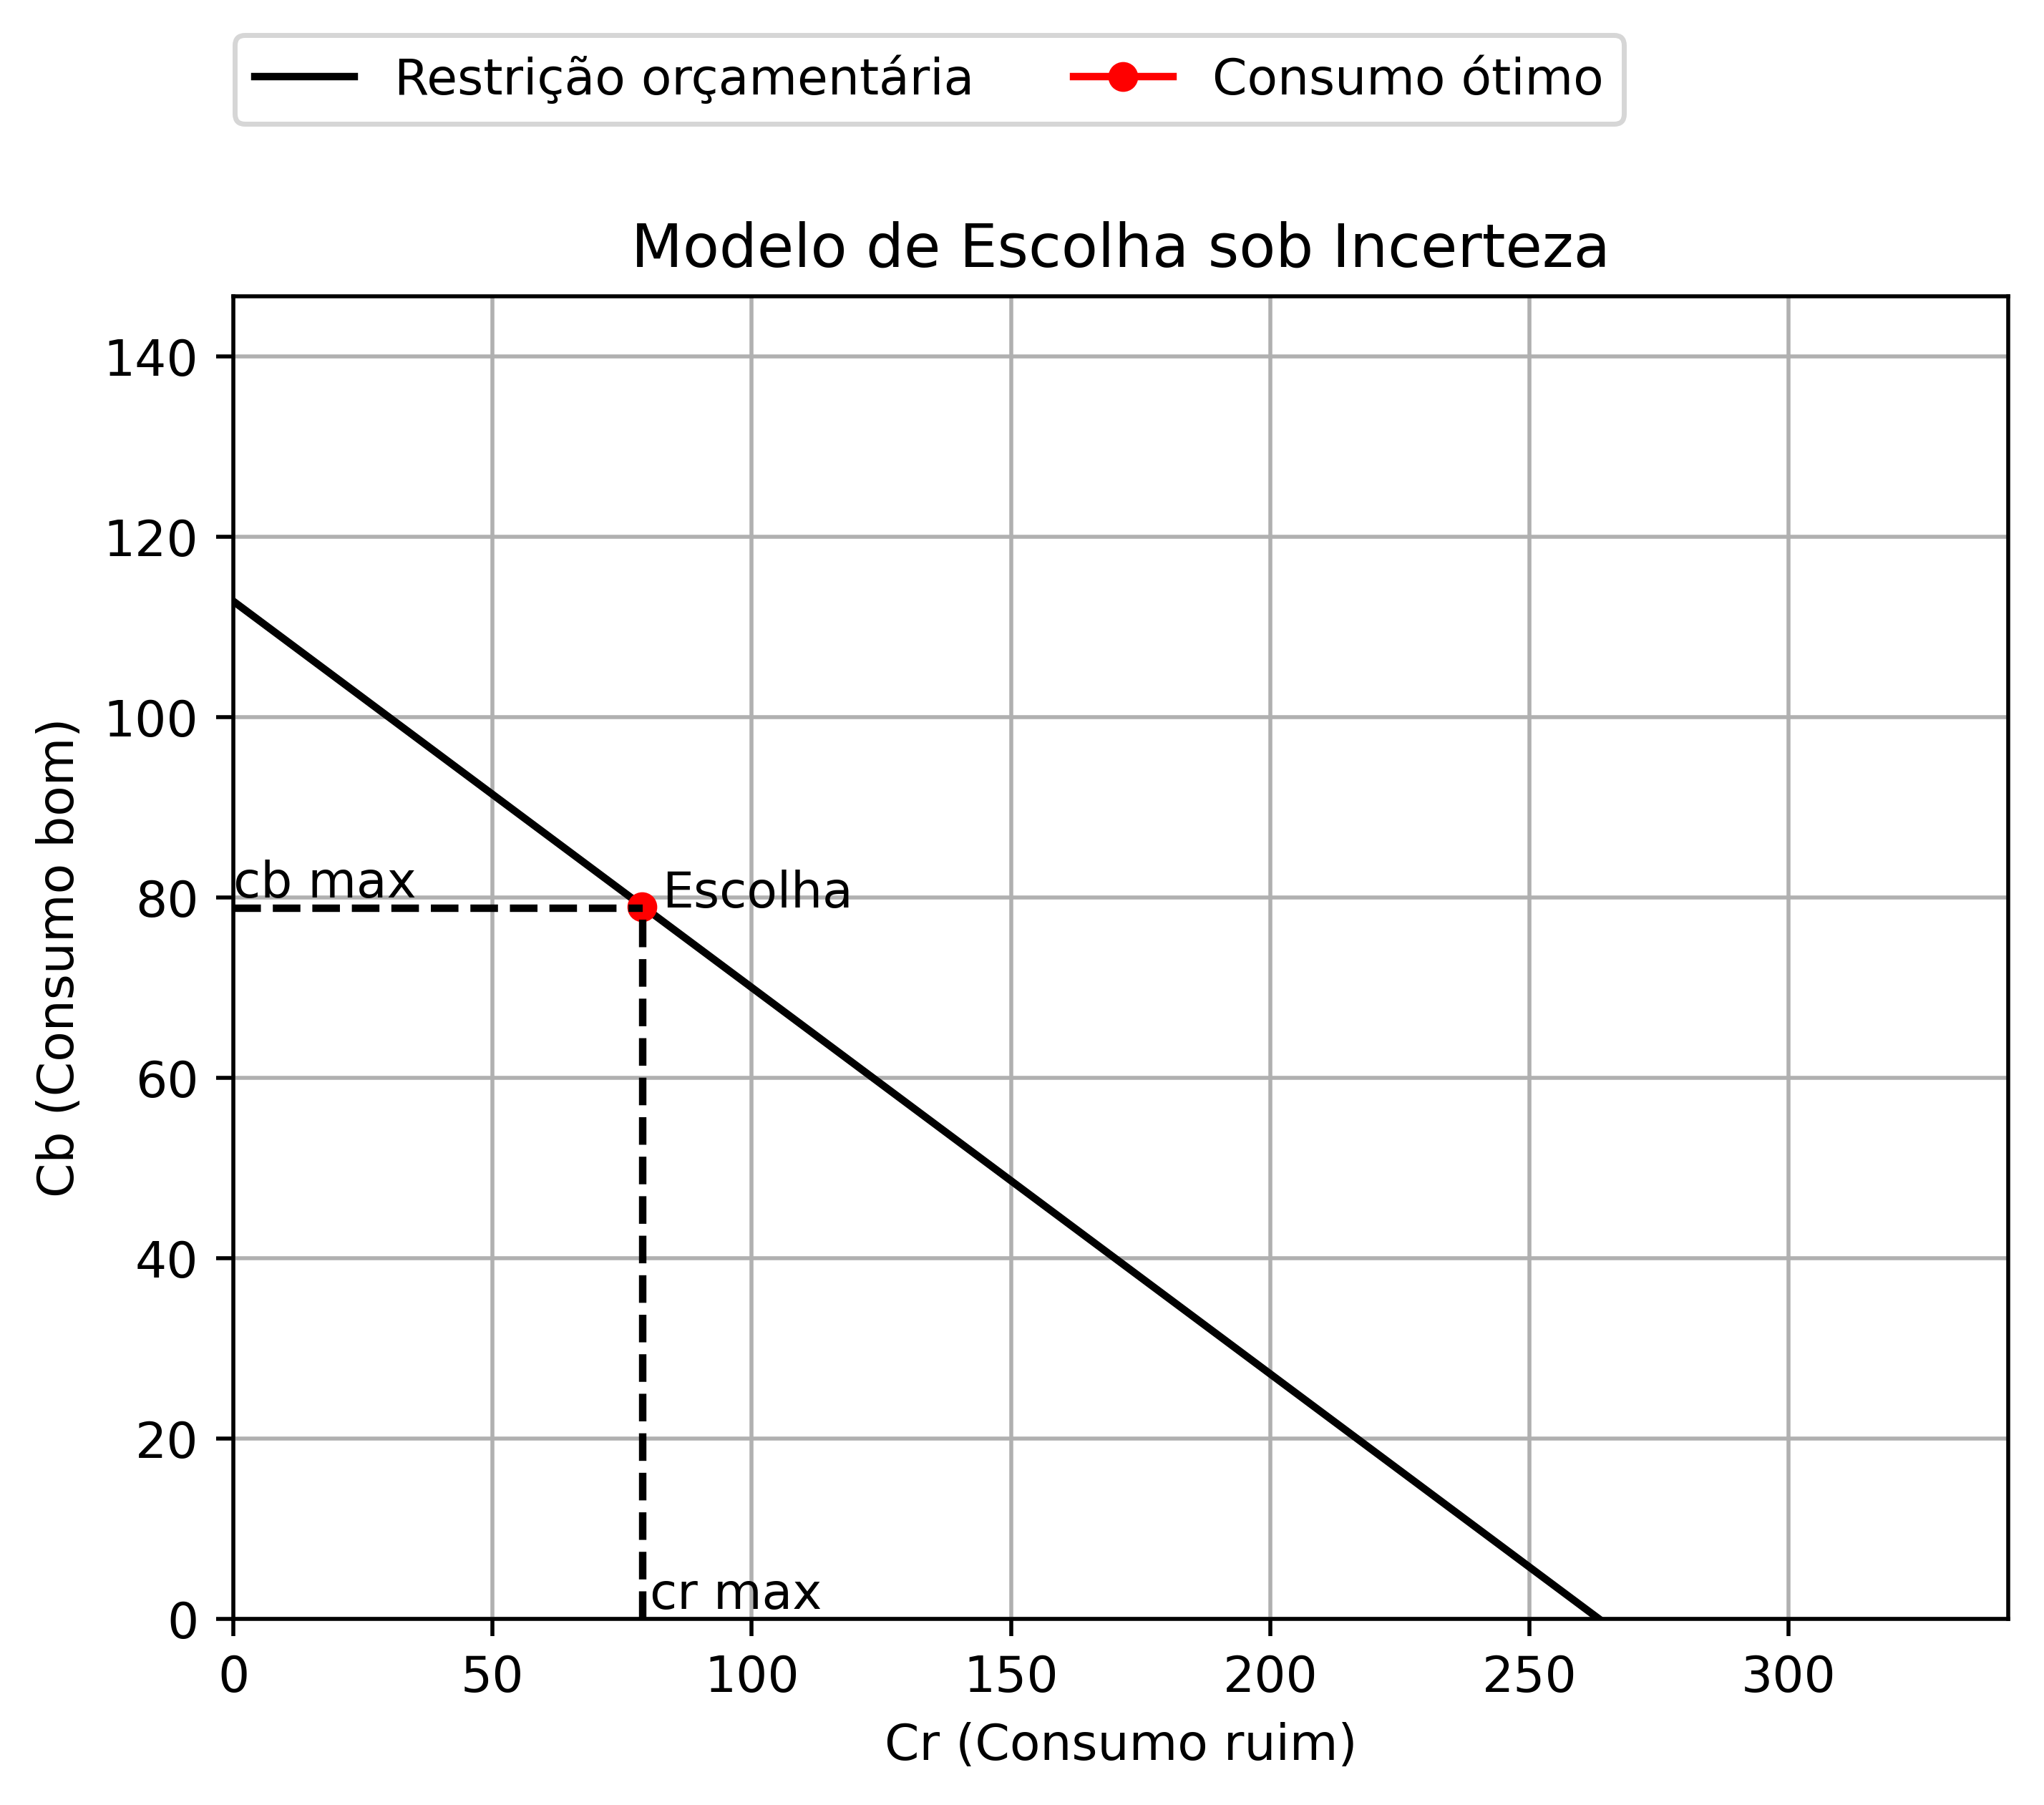

In [1]:
# Importa os módulos necessários
import matplotlib.pyplot as plt
import numpy as np

# Cria os parâmetros e as constantes
m = 100 # Riqueza inicial
n = 70 # Perda no estado ruim
g = 0.5 # Gamma (preço do seguro)
pi_b = 0.7 # Probabilidade do estado bom
pi_r = 1 - pi_b # Probabilidade do estado ruim
W =  pi_b * m + pi_r * (m - n) # Riqueza esperada

# Confere se os valores são válidos
assert (m > 0) and (n < m) and (0 < g < 1) and (0 < pi_b < 1) and (0 < pi_r < 1)

# Cria a função de utilidade
utilidade = lambda cb, cr: pi_b*np.log(cb) + pi_r*np.log(cr)

# Cria os grids
grid_cb = np.linspace(0.0000001, W / pi_b, 1000)
grid_cr = np.linspace(0.0000001, W / pi_r, 1000)

# Cria uma lista vazia
matriz_utilidade = []

# Cria um loop
for cb in grid_cb:
    lista_utilidade = []
    for cr in grid_cr:
        if (pi_b * cb + pi_r * cr) <= W:
            utilidade_consumo = utilidade(cb, cr)
        else:
            utilidade_consumo = -float("inf")
        lista_utilidade.append(utilidade_consumo)
    matriz_utilidade.append(lista_utilidade)

# Transforma a matriz em array
matriz_utilidade = np.array(matriz_utilidade)

# Coleta a posição do argumento de maior valor da linha e da coluna
indice_linha, indice_coluna = np.nanargmax(matriz_utilidade)//1000, \
    np.nanargmax(matriz_utilidade)%1000

# Calcula o consumo ótimo nos dois estados e a utilidade máxima
cb_max = grid_cb[indice_linha]
cr_max = grid_cr[indice_coluna]
uti_max = utilidade(cb_max, cr_max)

# Calcula o seguro ótimo
seguro_otimo = (m - cb_max) / (pi_r)

# Cria os pontos de intersepto do eixo x e y
eixo_x = (W / pi_r, 0)
eixo_y = (0, W / pi_b)

# Plota a curva de indiferença e a ROI
fig, ax = plt.subplots(dpi = 500) # Nitidez
ax.plot(eixo_x, eixo_y, color = 'black', label = "Restrição orçamentária") # ROI

# Plota os pontos e coloca a legenda
ax.plot(cr_max, cb_max, markersize = 5,
        marker = "o", color = "red", label = "Consumo ótimo") # Consumo
ax.legend(bbox_to_anchor=(0.001, 1.13, 0.5, 1.2), loc=3,
         fancybox=True, shadow = False, ncol = 3, borderaxespad=0) # Box de legenda
plt.title("Modelo de Escolha sob Incerteza")

# Define os intervalos e coloca a legenda nos eixos e no ponto
ax.set_xlim(0, (W / pi_r) * 1.3) # Intervalo do eixo x
ax.set_ylim(0, ((W / pi_b) * 1.3)) # Intervalo do eixo y
ax.set_xlabel("Cr (Consumo ruim)") # Da nome ao eixo x
ax.set_ylabel("Cb (Consumo bom)") # Da nome ao eixo y
ax.annotate("Escolha", xy = (cr_max * 1.05, cb_max)) # Legenda a escolha

# Coloca grade e plota o gráfico
plt.grid(True) # Coloca grade no gráfico

# Coloca linha pontilhada na escolha
plt.hlines(cr_max, 0, cb_max, linestyle = '--', color = "black") # Plota linha pontilhada
plt.vlines(cb_max, 0, cr_max, linestyle = '--', color = "black") # Plota linha pontilhada

# Legenda os interseptos das linhas pontilhadas
ax.annotate("cr max", (cr_max * 1.02, 0), ha = "left", va = "bottom", fontsize = 10)
ax.annotate("cb max", (0.05, cb_max), ha = "left", va = "bottom", fontsize = 10)

plt.show() # Plota o gráfico